<div style="text-align: center"> <span style="font-size:28px;"><b>Rents in Ireland</b> </span></div>

In [41]:
#Importing the libraries
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import ptitprince
from __future__ import print_function 
%matplotlib inline 

In [42]:
#Reading the dataset
df = pd.read_csv(r"C:/Users/Fabiola/Downloads/Ireland_rents.csv")

#Displaying the first 10 rows of the dataset
df.head()

,STATISTIC Label,Quarter,Number of Bedrooms,Property Type,Location,UNIT,VALUE
0,RTB Average Monthly Rent Report,2007Q4,All bedrooms,All property types,Carlow,Euro,805.30
1,RTB Average Monthly Rent Report,2007Q4,All bedrooms,All property types,Carlow Town,Euro,NaN
2,RTB Average Monthly Rent Report,2007Q4,All bedrooms,All property types,"Graiguecullen, Carlow",Euro,NaN
3,RTB Average Monthly Rent Report,2007Q4,All bedrooms,All property types,"Tullow, Carlow",Euro,724.37
4,RTB Average Monthly Rent Report,2007Q4,All bedrooms,All property types,Cavan,Euro,587.92


In [43]:
#Displaying the last 10 rows of the dataset
df.tail()

,STATISTIC Label,Quarter,Number of Bedrooms,Property Type,Location,UNIT,VALUE
802795,RTB Average Monthly Rent Report,2022Q3,Four plus bed,Other flats,"Delgany, Wicklow",Euro,NaN
802796,RTB Average Monthly Rent Report,2022Q3,Four plus bed,Other flats,"Greystones, Wicklow",Euro,NaN
802797,RTB Average Monthly Rent Report,2022Q3,Four plus bed,Other flats,"Kilcoole, Wicklow",Euro,NaN
802798,RTB Average Monthly Rent Report,2022Q3,Four plus bed,Other flats,"Newtownmountkennedy, Wicklow",Euro,NaN
802799,RTB Average Monthly Rent Report,2022Q3,Four plus bed,Other flats,"Rathnew, Wicklow",Euro,NaN


In [44]:
#Checking the size
df.shape

(802800, 7)

In [45]:
#Gettig some information about the dataset
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802800 entries, 0 to 802799
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   STATISTIC Label     802800 non-null  object 
 1   Quarter             802800 non-null  object 
 2   Number of Bedrooms  802800 non-null  object 
 3   Property Type       802800 non-null  object 
 4   Location            802800 non-null  object 
 5   UNIT                802800 non-null  object 
 6   VALUE               204771 non-null  float64
dtypes: float64(1), object(6)
memory usage: 42.9+ MB


In [46]:
#Statistical description of the numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VALUE,204771.0,1011.750505,479.345992,233.67,650.32,901.88,1252.335,6522.48


In [47]:
#Statistical description of the categorical variables
df.describe(include=object).T

,count,unique,top,freq
STATISTIC Label,802800,1,RTB Average Monthly Rent Report,802800
Quarter,802800,60,2007Q4,13380
Number of Bedrooms,802800,5,All bedrooms,160560
Property Type,802800,6,All property types,133800
Location,802800,446,Carlow,1800
UNIT,802800,1,Euro,802800


In [48]:
#Checking duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (0, 7)


In [49]:
#Reviewing missing values
df.isnull().values.any()

True

In [50]:
#Total missing values per column
df.isnull().sum()

STATISTIC Label            0
Quarter                    0
Number of Bedrooms         0
Property Type              0
Location                   0
UNIT                       0
VALUE                 598029
dtype: int64

In [51]:
#Percentage of missing values per feature
mis_value_percent = 100 * df.isnull().sum() / len(df)
print(mis_value_percent)

STATISTIC Label        0.0000
Quarter                0.0000
Number of Bedrooms     0.0000
Property Type          0.0000
Location               0.0000
UNIT                   0.0000
VALUE                 74.4929
dtype: float64


<AxesSubplot:>

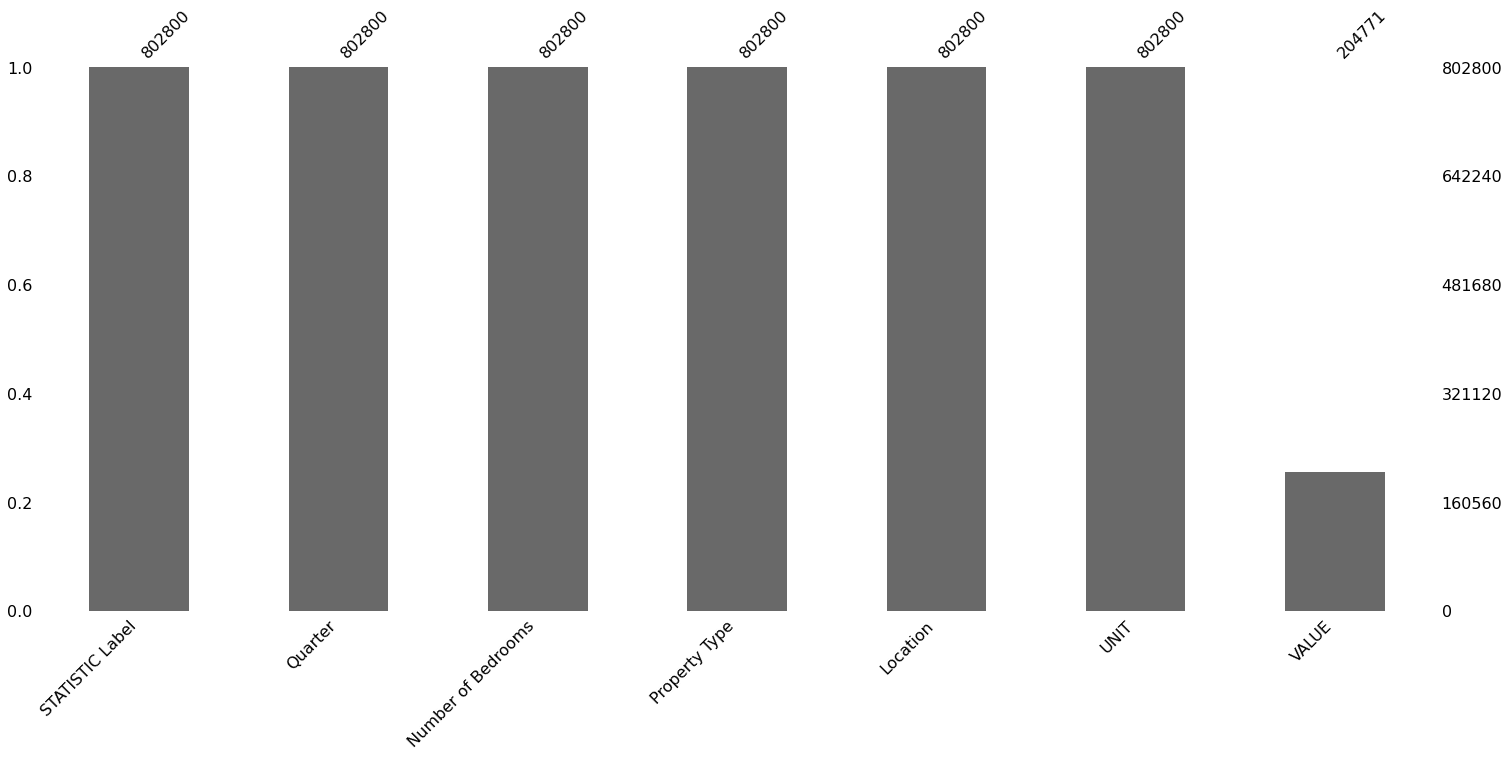

In [52]:
#Visualising missing values graphically
msno.bar(df)

<AxesSubplot:>

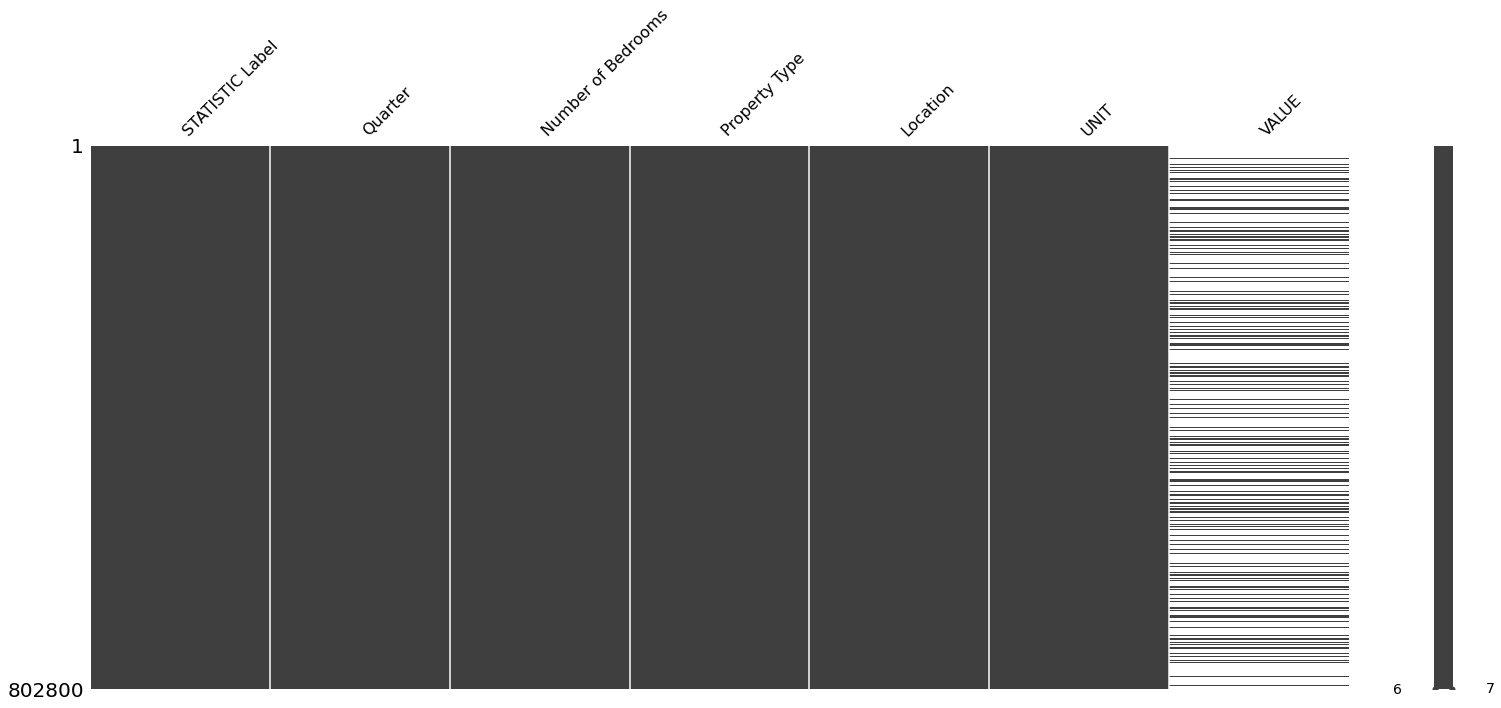

In [53]:
#Visualising missing values graphically
msno.matrix(df)

Next we will analyze the unique values ​​per column.

In [54]:
#Analyzing unique values ​​within the STATISTIC column
df['STATISTIC Label'].unique()

array(['RTB Average Monthly Rent Report'], dtype=object)

In [55]:
#Analyzing unique values ​​within the Quarter column
df['Quarter'].unique()

array(['2007Q4', '2008Q1', '2008Q2', '2008Q3', '2008Q4', '2009Q1',
       '2009Q2', '2009Q3', '2009Q4', '2010Q1', '2010Q2', '2010Q3',
       '2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1',
       '2012Q2', '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3',
       '2013Q4', '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1',
       '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3',
       '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1',
       '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3',
       '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1',
       '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3'],
      dtype=object)

In [56]:
#Analysing the total frequency by category
df['Quarter'].value_counts()

2007Q4    13380
2008Q1    13380
2015Q4    13380
2016Q1    13380
2016Q2    13380
2016Q3    13380
2016Q4    13380
2017Q1    13380
2017Q2    13380
2017Q3    13380
2017Q4    13380
2018Q1    13380
2018Q2    13380
2018Q3    13380
2018Q4    13380
2019Q1    13380
2019Q2    13380
2019Q3    13380
2019Q4    13380
2020Q1    13380
2020Q2    13380
2020Q3    13380
2020Q4    13380
2021Q1    13380
2021Q2    13380
2021Q3    13380
2021Q4    13380
2022Q1    13380
2022Q2    13380
2015Q3    13380
2015Q2    13380
2015Q1    13380
2011Q2    13380
2008Q2    13380
2008Q3    13380
2008Q4    13380
2009Q1    13380
2009Q2    13380
2009Q3    13380
2009Q4    13380
2010Q1    13380
2010Q2    13380
2010Q3    13380
2010Q4    13380
2011Q1    13380
2011Q3    13380
2014Q4    13380
2011Q4    13380
2012Q1    13380
2012Q2    13380
2012Q3    13380
2012Q4    13380
2013Q1    13380
2013Q2    13380
2013Q3    13380
2013Q4    13380
2014Q1    13380
2014Q2    13380
2014Q3    13380
2022Q3    13380
Name: Quarter, dtype: int64

In [57]:
#Analyzing unique values ​​within the Number of Bedrooms column
df['Number of Bedrooms'].unique()

array(['All bedrooms', 'One bed', 'Two bed', 'Three bed', 'Four plus bed'],
      dtype=object)

In [58]:
#Analysing the total frequency by category
df['Number of Bedrooms'].value_counts()

All bedrooms     160560
One bed          160560
Two bed          160560
Three bed        160560
Four plus bed    160560
Name: Number of Bedrooms, dtype: int64

In [59]:
#Analyzing unique values ​​within the Property Type column
df['Property Type'].unique()

array(['All property types', 'Detached house', 'Semi detached house',
       'Terrace house', 'Apartment', 'Other flats'], dtype=object)

In [60]:
#Analysing the total frequency by category
df['Property Type'].value_counts()

All property types     133800
Detached house         133800
Semi detached house    133800
Terrace house          133800
Apartment              133800
Other flats            133800
Name: Property Type, dtype: int64

In [61]:
#Analyzing unique values ​​within the Location column
df['Location'].unique()

array(['Carlow', 'Carlow Town', 'Graiguecullen, Carlow', 'Tullow, Carlow',
       'Cavan', 'Cavan Town', 'Bailieborough, Cavan',
       'Ballyconnell, Cavan', 'Ballyjamesduff, Cavan', 'Belturbet, Cavan',
       'Cootehill, Cavan', 'Kingscourt, Cavan', 'Virginia, Cavan',
       'Clare', 'Ennis, Clare', 'Killaloe, Clare', 'Kilrush, Clare',
       'Newmarket-On-Fergus, Clare', 'Shannon, Clare',
       'Sixmilebridge, Clare', 'Cork', 'Cork City', 'Ballincollig, Cork',
       'Ballintemple, Cork', 'Ballinure, Cork', 'Bandon, Cork',
       'Bantry, Cork', 'Bishopstown, Cork', 'Blackpool, Cork',
       'Blackrock, Cork', 'Blarney, Cork', 'Carrigaline, Cork',
       'Carrigtwohill, Cork', 'Castlemartyr, Cork', 'Charleville, Cork',
       'Clonakilty, Cork', 'Cloyne, Cork', 'Cobh, Cork',
       'Crosshaven, Cork', 'Douglas, Cork', 'Dunmanway, Cork',
       'Fermoy, Cork', 'Frankfield, Cork', 'Glanmire, Cork',
       'Kanturk, Cork', 'Kinsale, Cork', 'Macroom, Cork', 'Mallow, Cork',
       'Midl

In [62]:
#Analysing the total frequency by category
df['Location'].value_counts()

Carlow                         1800
Callan, Kilkenny               1800
Carrick-On-Shannon, Leitrim    1800
Leitrim                        1800
Portlaoise, Laois              1800
                               ... 
Harolds Cross, Dublin 6W       1800
Dublin 6W                      1800
Terenure, Dublin 6             1800
Rathmines, Dublin 6            1800
Rathnew, Wicklow               1800
Name: Location, Length: 446, dtype: int64

In [63]:
#Analyzing unique values ​​within the UNIT column
df['UNIT'].unique()

array(['Euro'], dtype=object)

In [64]:
#Analysing the total frequency by category
df['UNIT'].value_counts()

Euro    802800
Name: UNIT, dtype: int64

**DATA PREPARATION**

Since a high percentage of missing values have been presented and to have a better management of our database, we will proceed to eliminate those rows with missing data.

In [65]:
# Dropping rows with missing values
df2 = df.dropna()

In [66]:
#Checking the size
df2.shape

(204771, 7)

In [67]:
#Dropping unnecesary columns
df2.drop(['STATISTIC Label','UNIT'], axis=1, inplace=True)


c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [68]:
df2.head(10)

,Quarter,Number of Bedrooms,Property Type,Location,VALUE
0,2007Q4,All bedrooms,All property types,Carlow,805.30
3,2007Q4,All bedrooms,All property types,"Tullow, Carlow",724.37
4,2007Q4,All bedrooms,All property types,Cavan,587.92
10,2007Q4,All bedrooms,All property types,"Cootehill, Cavan",572.56
13,2007Q4,All bedrooms,All property types,Clare,715.90
14,2007Q4,All bedrooms,All property types,"Ennis, Clare",699.39
18,2007Q4,All bedrooms,All property types,"Shannon, Clare",760.81
20,2007Q4,All bedrooms,All property types,Cork,956.63
21,2007Q4,All bedrooms,All property types,Cork City,1046.73
22,2007Q4,All bedrooms,All property types,"Ballincollig, Cork",1043.01


In [71]:
# Convert the date column to datetime
df2['Quarter'] = pd.to_datetime(df2['Quarter'])

C:\Users\Fabiola\AppData\Local\Temp/ipykernel_24788/3577300986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Quarter'] = pd.to_datetime(df2['Quarter'])


In [72]:
df2

,Quarter,Number of Bedrooms,Property Type,Location,VALUE
0,2007-10-01,All bedrooms,All property types,Carlow,805.30
3,2007-10-01,All bedrooms,All property types,"Tullow, Carlow",724.37
4,2007-10-01,All bedrooms,All property types,Cavan,587.92
10,2007-10-01,All bedrooms,All property types,"Cootehill, Cavan",572.56
13,2007-10-01,All bedrooms,All property types,Clare,715.90
...,...,...,...,...,...
801929,2022-07-01,Four plus bed,Apartment,Cork City,1798.44
801979,2022-07-01,Four plus bed,Apartment,Dublin,2684.59
802146,2022-07-01,Four plus bed,Apartment,Galway,1640.42
802147,2022-07-01,Four plus bed,Apartment,Galway City,1799.70


In [73]:
#Breaking Down the Date into 3 Components
df2['Day']=df2['Quarter'].dt.day

df2["Month"]=df2.Quarter.dt.month_name().str[:3]

df2['Year']=df2['Quarter'].dt.year

C:\Users\Fabiola\AppData\Local\Temp/ipykernel_24788/1955809298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Day']=df2['Quarter'].dt.day
C:\Users\Fabiola\AppData\Local\Temp/ipykernel_24788/1955809298.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Month"]=df2.Quarter.dt.month_name().str[:3]
C:\Users\Fabiola\AppData\Local\Temp/ipykernel_24788/1955809298.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [74]:
#Creating new columns for the new components...
df2['Day of the week'] = df2.Quarter.dt.dayofweek
df2['Day of the week'] = df2['Day of the week'].map({0: "Monday",1: "Tuesday",2: "Wednesday" ,3: "Thursday",4:"Friday",5:"Saturday",6:"Sunday"}) #Renaming the days of the week
df2['Day of the week'] = pd.Categorical(df2['Day of the week'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

C:\Users\Fabiola\AppData\Local\Temp/ipykernel_24788/4257607487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Day of the week'] = df2.Quarter.dt.dayofweek
C:\Users\Fabiola\AppData\Local\Temp/ipykernel_24788/4257607487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Day of the week'] = df2['Day of the week'].map({0: "Monday",1: "Tuesday",2: "Wednesday" ,3: "Thursday",4:"Friday",5:"Saturday",6:"Sunday"}) #Renaming the days of the week
C:\Users\Fabiola\AppData\Local\Temp/ipykernel_24788/4257

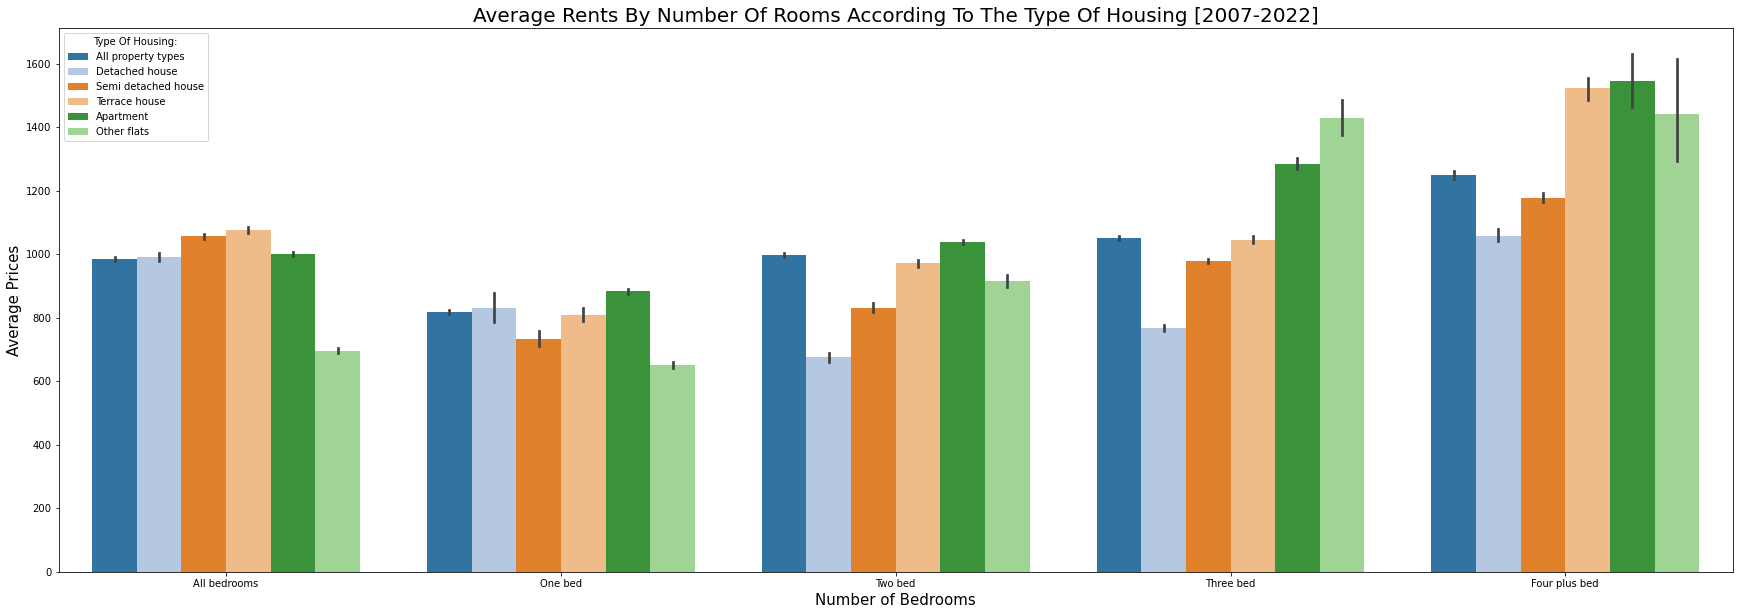

In [80]:
#Bar graph of average rent, from 2007 to 2022.
f, ax = plt.subplots(1, 1, figsize=(30, 10))
ax =sns.barplot(x='Number of Bedrooms', y='VALUE', hue='Property Type', data=df2, palette='tab20')

plt.title('Average Rents By Number Of Rooms According To The Type Of Housing [2007-2022]', fontsize =20)
plt.ylabel("Average Prices", fontsize =15)
plt.xlabel('Number of Bedrooms', fontsize =15)


plt.legend(title = "Type Of Housing:", loc='upper left', fontsize=10)

plt.savefig('barplot2.png', dpi=300, bbox_inches='tight');